In [38]:
import pandas as pd
import tensorflow as tf
import keras as keras

In [39]:
import xarray as xr
ds = xr.open_dataset('inter-999-interpol.nc')
df = ds.to_dataframe()

In [40]:
df.index = pd.to_datetime(df.index)
df.dropna(subset = ["blizzard"], inplace=True)
df

tempr      ap     ws      wd     rh  blizzard
obstime                                                           
2016-06-02 00:00:00 -13.58  966.75  15.42   76.03  49.40       0.0
2016-06-02 01:00:00 -13.95  966.69  14.87   77.85  50.22       0.0
2016-06-02 02:00:00 -13.96  966.83  13.08   77.47  49.27       0.0
2016-06-02 03:00:00 -14.16  967.02  12.83   78.15  49.02       0.0
2016-06-02 04:00:00 -14.49  967.24  13.35   79.85  49.33       0.0
...                    ...     ...    ...     ...    ...       ...
2019-06-19 19:00:00 -26.06  985.45   9.87  178.30  68.47       0.0
2019-06-19 20:00:00 -26.10  986.18   9.72  181.10  68.88       0.0
2019-06-19 21:00:00 -26.75  986.89   9.52  178.45  66.32       0.0
2019-06-19 22:00:00 -27.64  987.76  10.82  187.17  64.92       0.0
2019-06-19 23:00:00 -27.46  988.86  12.74  190.50  61.88       0.0

[26024 rows x 6 columns]

In [41]:
df_features=df.iloc[:, 0:5 ]

df_target=df.iloc[:,5:]

df_features


tempr      ap     ws      wd     rh
obstime                                                 
2016-06-02 00:00:00 -13.58  966.75  15.42   76.03  49.40
2016-06-02 01:00:00 -13.95  966.69  14.87   77.85  50.22
2016-06-02 02:00:00 -13.96  966.83  13.08   77.47  49.27
2016-06-02 03:00:00 -14.16  967.02  12.83   78.15  49.02
2016-06-02 04:00:00 -14.49  967.24  13.35   79.85  49.33
...                    ...     ...    ...     ...    ...
2019-06-19 19:00:00 -26.06  985.45   9.87  178.30  68.47
2019-06-19 20:00:00 -26.10  986.18   9.72  181.10  68.88
2019-06-19 21:00:00 -26.75  986.89   9.52  178.45  66.32
2019-06-19 22:00:00 -27.64  987.76  10.82  187.17  64.92
2019-06-19 23:00:00 -27.46  988.86  12.74  190.50  61.88

[26024 rows x 5 columns]

In [42]:
#     from sklearn.model_selection import train_test_split 
#     X_train, X_test, y_train, y_test = train_test_split (df_features, df_target.values, test_size=0.3, random_state=0)
h = 1*730-

X_train = df_features.iloc[0:-(3980 - 1*730,:]
X_test =df_features.iloc[-h:,:]
y_train = df_target.iloc[0:-h].values
y_test = df_target.iloc[-h:].values
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
rtime=X_test.index
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
# X_test.shape
# y_test
rtime

DatetimeIndex(['2019-05-27 07:00:00', '2019-05-26 22:00:00',
               '2019-05-19 17:00:00', '2019-05-20 10:00:00',
               '2019-06-04 10:00:00', '2019-06-01 11:00:00',
               '2019-05-31 15:00:00', '2019-06-18 20:00:00',
               '2019-06-08 05:00:00', '2019-05-20 06:00:00',
               ...
               '2019-05-22 01:00:00', '2019-06-14 03:00:00',
               '2019-05-30 16:00:00', '2019-05-19 12:00:00',
               '2019-06-03 03:00:00', '2019-06-19 01:00:00',
               '2019-05-27 03:00:00', '2019-06-15 19:00:00',
               '2019-06-12 11:00:00', '2019-06-18 02:00:00'],
              dtype='datetime64[ns]', name='obstime', length=730, freq=None)

In [35]:
X_train= X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))            

In [36]:
X_test.shape

(3980, 1, 5)

In [37]:
import keras.layers as KL

inputs = KL.Input(shape=(1,5))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = keras.models.Model(inputs, outputs)



In [9]:
opt = keras.optimizers.Adamax() 

In [10]:
model.compile( optimizer=opt , loss='binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(X_train,y_train, batch_size=16, epochs=50, class_weight={0:1, 1:2})

Epoch 1/50
1378/1378 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.9717
Epoch 2/50
1378/1378 [==============================] - 3s 2ms/step - loss: 0.1966 - accuracy: 0.9754
Epoch 3/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1846 - accuracy: 0.9754
Epoch 4/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1710 - accuracy: 0.9754
Epoch 5/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1572 - accuracy: 0.9754
Epoch 6/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1433 - accuracy: 0.9754
Epoch 7/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1305 - accuracy: 0.9755
Epoch 8/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1188 - accuracy: 0.9762
Epoch 9/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.1087 - accuracy: 0.9779
Epoch 10/50
1378/1378 [==============================] - 2s 2ms/step - loss: 0.100

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.plot(range(30),history.history['loss'])

NameError: name 'history' is not defined

In [14]:
y_pred=model.predict(X_test)
y_pred

array([[7.6159835e-04],
       [4.7582388e-03],
       [1.6357166e-05],
       ...,
       [3.0949168e-04],
       [1.2127737e-03],
       [9.4520925e-05]], dtype=float32)

In [15]:
import seaborn as sns
import numpy as np

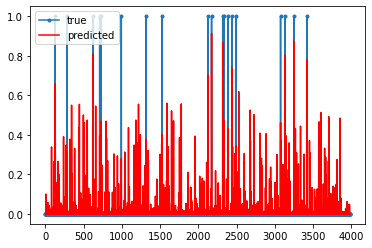

In [16]:
plt.plot(y_test.flatten(), marker='.', label='true')
plt.plot(y_pred.flatten(), 'r', label='predicted')
plt.legend()
plt.show()

In [17]:
y_pred=[1 if y>=0.59 else 0 for y in y_pred]

In [18]:
y_pred[0:-1]
print(np.sum(y_pred))


10


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

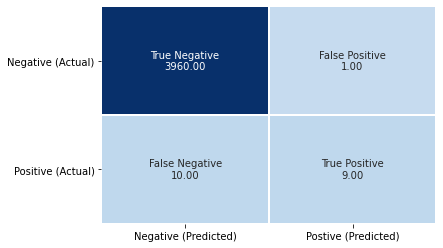

In [19]:
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error
confudf = pd.DataFrame(confusion_matrix(y_test,y_pred), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,y_pred).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)

#plt.savefig("Confusion Matrix RNN(Adamax)", bbox_inches = 'tight')

In [20]:
cr = classification_report(y_test, y_pred,output_dict=True)
cr = pd.DataFrame(cr).transpose()
cr.rename(columns={'f1-score': 'f1'}, inplace=True)
cr




precision    recall        f1      support
0.0            0.997481  0.999748  0.998613  3961.000000
1.0            0.900000  0.473684  0.620690    19.000000
accuracy       0.997236  0.997236  0.997236     0.997236
macro avg      0.948741  0.736716  0.809651  3980.000000
weighted avg   0.997016  0.997236  0.996809  3980.000000

In [21]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Error: ',round(rmse,5))

RMSE Error:  0.05257


In [22]:
X_train = df_features.iloc[0:-3980,:]
X_test =df_features.iloc[-3980:,:]
y_train = df_target.iloc[0:-3980].values
y_test = df_target.iloc[-3980:].values
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [23]:
dfy=pd.DataFrame(data={ 'ws':X_test.ws,'ap':X_test.ap,'rh':X_test.rh,'tempr':X_test.tempr, 'wd':X_test.wd, 'actual':y_test.flatten(), 'pred':y_pred})

In [24]:
dfy['result']='no'
for i in range(len(dfy)):
  if (dfy['pred'][i]==1):
    if (dfy['actual'][i]==1):
      dfy['result'][i]='correct'
    if (dfy['actual'][i]==0):
      dfy['result'][i]='incorrect'
  else:
    dfy['result'][i]='no'

c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [25]:
# dfy=dfy.sort_values('obstime')
dfy

ws      ap     rh  tempr      wd  actual  pred result
obstime                                                                      
2019-05-22 02:00:00   9.57  994.95  53.20 -22.06   86.13     0.0     0     no
2019-02-27 16:00:00   7.94  981.42  78.02  -1.54   69.20     0.0     0     no
2019-01-10 10:00:00   5.82  984.19  47.05   4.99  178.72     0.0     0     no
2019-01-27 20:00:00   9.68  982.24  43.95  -5.19   92.77     0.0     0     no
2019-02-24 02:00:00  14.60  986.26  41.76  -5.43   73.62     0.0     0     no
...                    ...     ...    ...    ...     ...     ...   ...    ...
2019-02-04 22:00:00  21.38  973.06  68.09  -3.66   56.83     0.0     0     no
2019-05-19 17:00:00   5.41  991.32  46.00 -19.62   81.15     0.0     0     no
2019-03-11 15:00:00   8.71  975.70  51.06  -7.27  126.48     0.0     0     no
2019-04-22 01:00:00  13.34  984.06  41.32 -12.95   68.33     0.0     0     no
2019-04-27 10:00:00   1.28  989.81  59.16 -11.44  126.63     0.0     0     no

[3980 rows x 8 columns]

In [26]:
dfy=dfy.sort_values('obstime')

dfy

ws      ap     rh  tempr      wd  actual  pred result
obstime                                                                      
2019-01-01 00:00:00  19.12  982.55  35.65  -0.72   75.29     0.0     0     no
2019-01-01 01:00:00  19.78  982.30  32.88  -0.05   72.93     0.0     0     no
2019-01-01 02:00:00  20.50  981.97  31.19   0.61   71.25     0.0     0     no
2019-01-01 03:00:00  19.25  981.84  30.32   1.19   61.32     0.0     0     no
2019-01-01 04:00:00  19.19  981.65  30.38   1.74   55.35     0.0     0     no
...                    ...     ...    ...    ...     ...     ...   ...    ...
2019-06-19 19:00:00   9.87  985.45  68.47 -26.06  178.30     0.0     0     no
2019-06-19 20:00:00   9.72  986.18  68.88 -26.10  181.10     0.0     0     no
2019-06-19 21:00:00   9.52  986.89  66.32 -26.75  178.45     0.0     0     no
2019-06-19 22:00:00  10.82  987.76  64.92 -27.64  187.17     0.0     0     no
2019-06-19 23:00:00  12.74  988.86  61.88 -27.46  190.50     0.0     0     no

[3980 rows x 8 columns]

In [29]:
mf = df.iloc[-3980:,:]
mf

tempr      ap     ws      wd     rh  blizzard
obstime                                                           
2019-01-01 00:00:00  -0.72  982.55  19.12   75.29  35.65       0.0
2019-01-01 01:00:00  -0.05  982.30  19.78   72.93  32.88       0.0
2019-01-01 02:00:00   0.61  981.97  20.50   71.25  31.19       0.0
2019-01-01 03:00:00   1.19  981.84  19.25   61.32  30.32       0.0
2019-01-01 04:00:00   1.74  981.65  19.19   55.35  30.38       0.0
...                    ...     ...    ...     ...    ...       ...
2019-06-19 19:00:00 -26.06  985.45   9.87  178.30  68.47       0.0
2019-06-19 20:00:00 -26.10  986.18   9.72  181.10  68.88       0.0
2019-06-19 21:00:00 -26.75  986.89   9.52  178.45  66.32       0.0
2019-06-19 22:00:00 -27.64  987.76  10.82  187.17  64.92       0.0
2019-06-19 23:00:00 -27.46  988.86  12.74  190.50  61.88       0.0

[3980 rows x 6 columns]

In [45]:
degree_sign = u'\N{DEGREE SIGN}'
labels = {
        'tempr': 'Temperature (' + degree_sign + 'C)',
        'ap': 'Atmospheric Pressure (mbar)',
        'ws': 'Wind Speed (knots)',
        'rh': 'Relative Humidity (%)'
    }

<Figure size 1440x720 with 0 Axes>

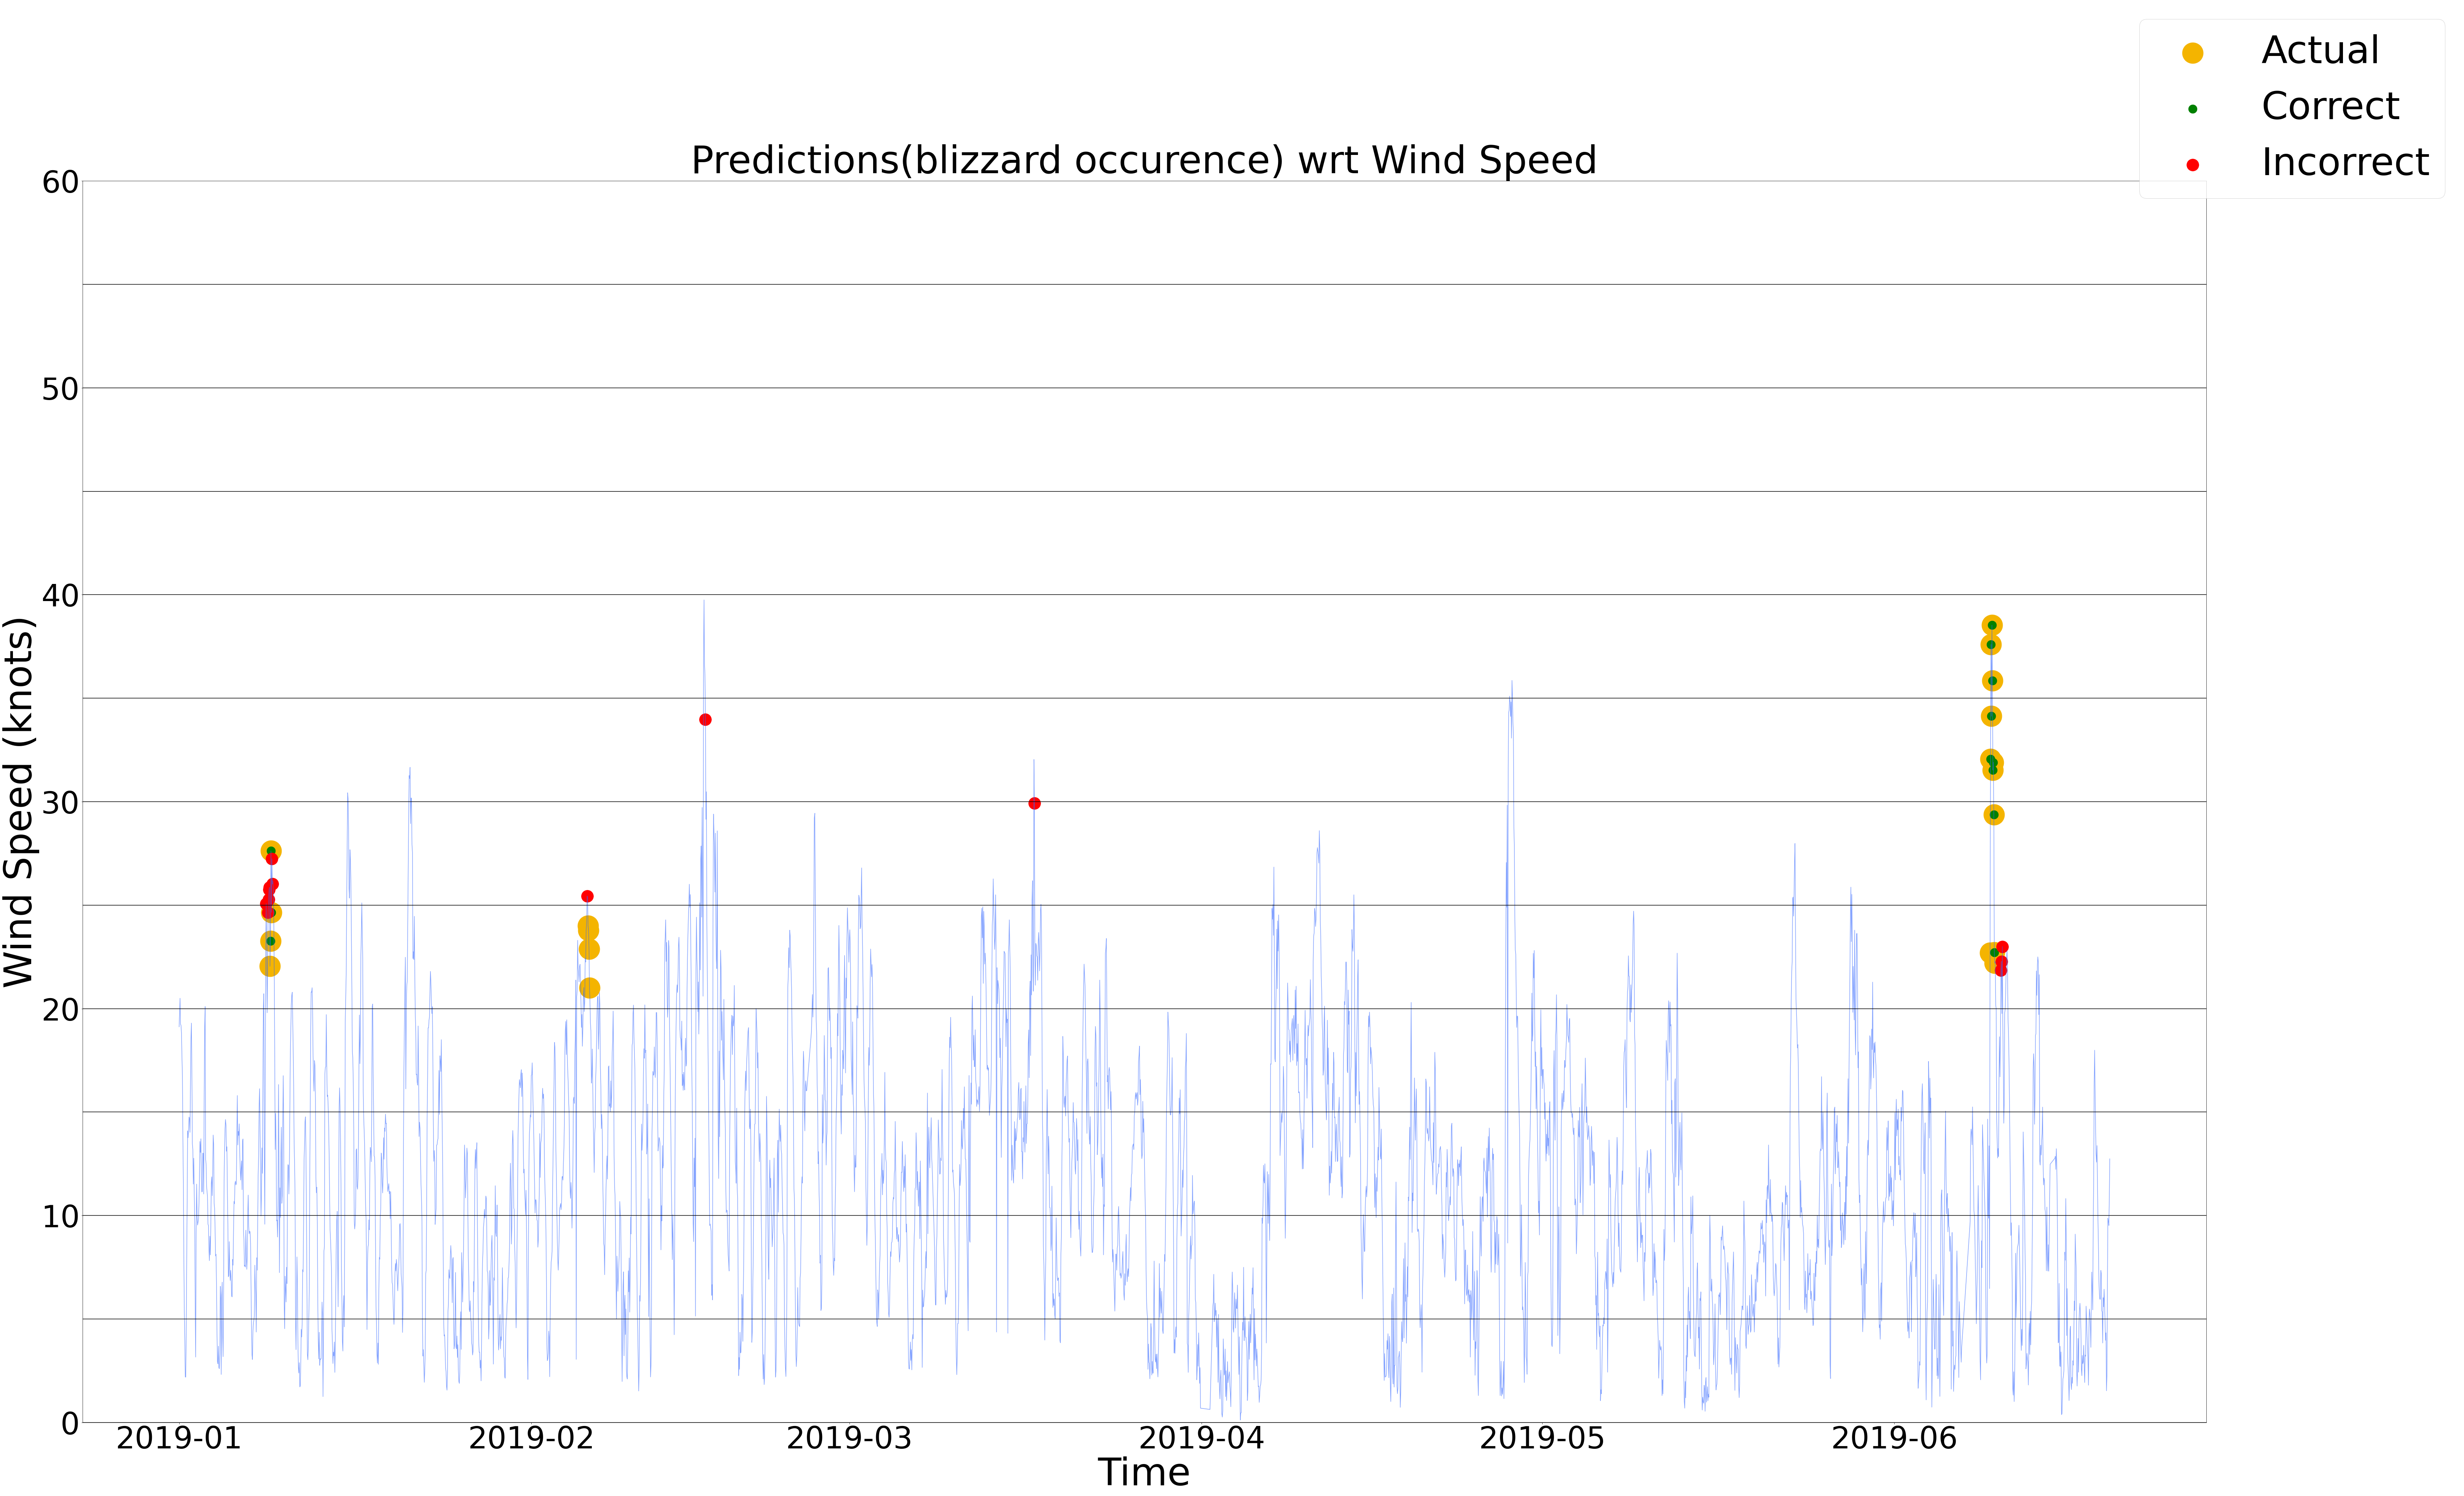

In [46]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.ws,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['ws'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['ws'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['ws'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(0,60)

for i in range(0,60,5):
  plt.axhline(y = i, c = 'black')



fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Wind Speed', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Wind Speed (knots)', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

<Figure size 1440x720 with 0 Axes>

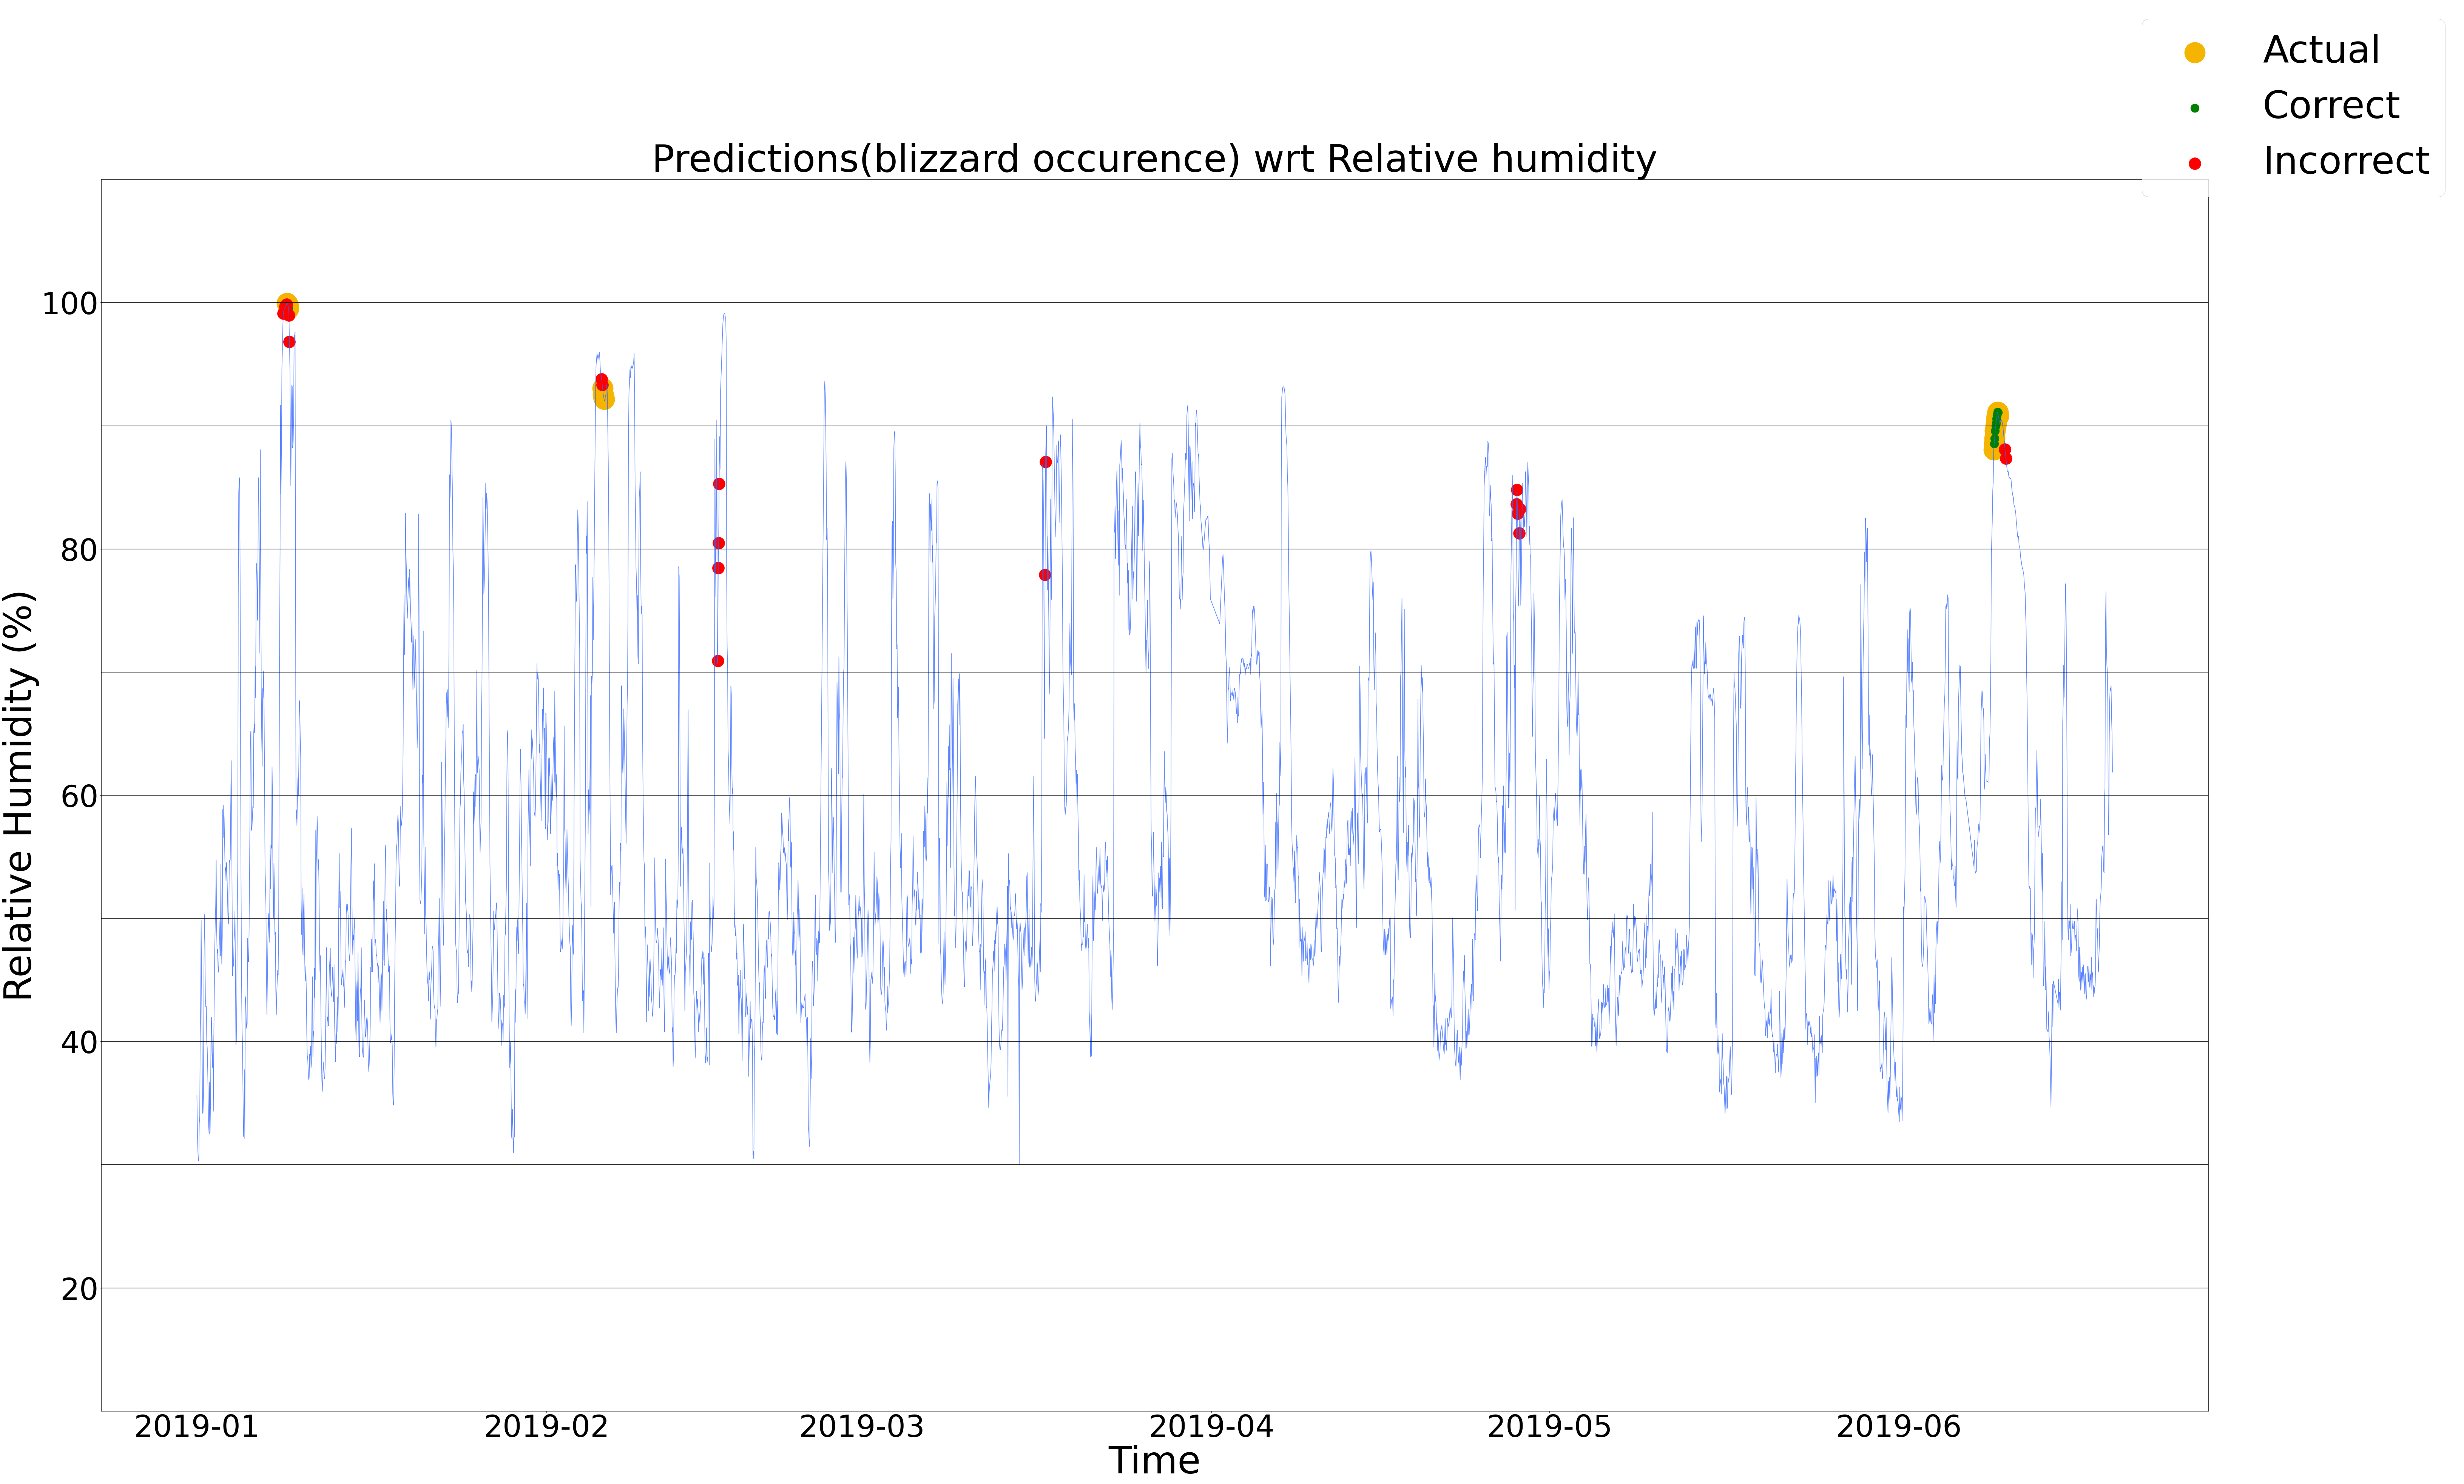

In [29]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.set_facecolor('white')

ax1.plot(dfy.index,dfy.rh,color = '#3366ff', alpha=0.8)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['rh'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['rh'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['rh'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(10,110)

for i in range(10,110,10):
    plt.axhline(y = i, c = 'black')


fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Relative humidity', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Relative Humidity (%)', fontsize=100)
#plt.savefig('Predictions(blizzard Occurence) relative humidity(RNN)(Adamax).png', bbox_inches = 'tight')
plt.show()


<Figure size 1440x720 with 0 Axes>

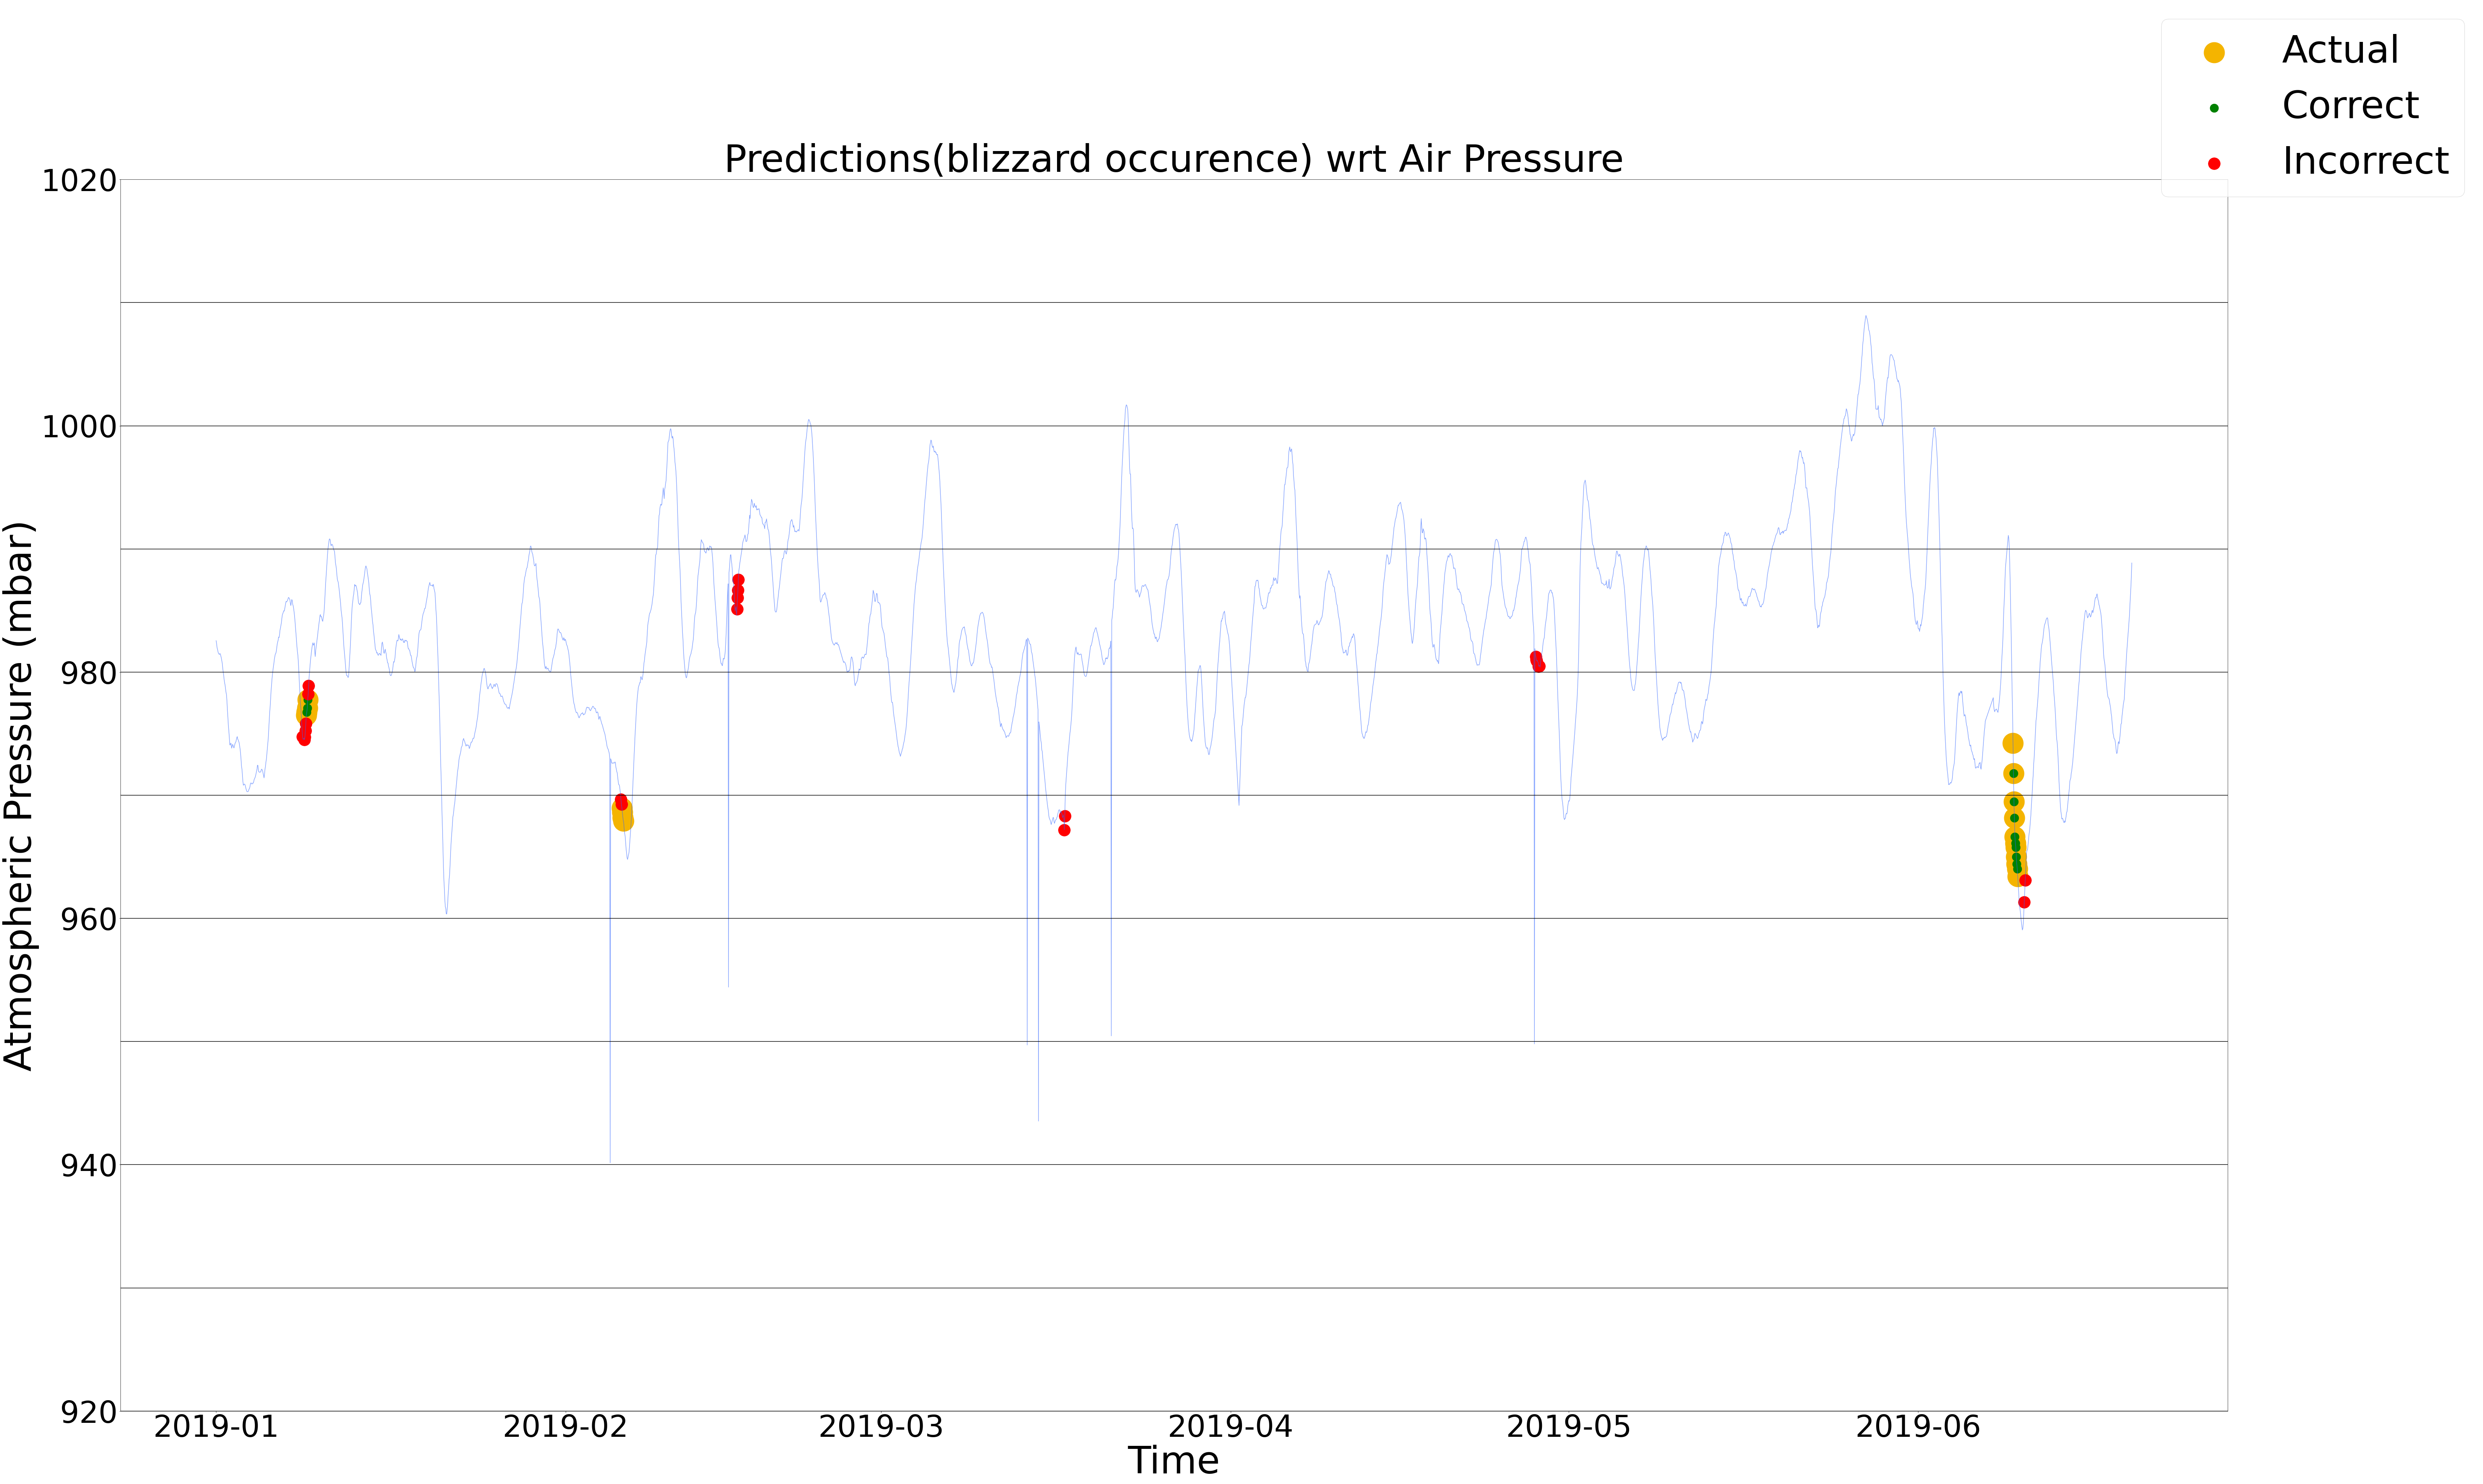

In [30]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.set_facecolor('white')

ax1.plot(dfy.index,dfy.ap,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['ap'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['ap'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['ap'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(920,1020)

for i in range(920,1020,10):
    plt.axhline(y = i, c = 'black')

fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Air Pressure', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Atmospheric Pressure (mbar)', fontsize=100)

#plt.savefig('Predictions(blizzard Occurence) wrt air pressure(RNN)(Adamax).png')

plt.show()


<Figure size 1440x720 with 0 Axes>

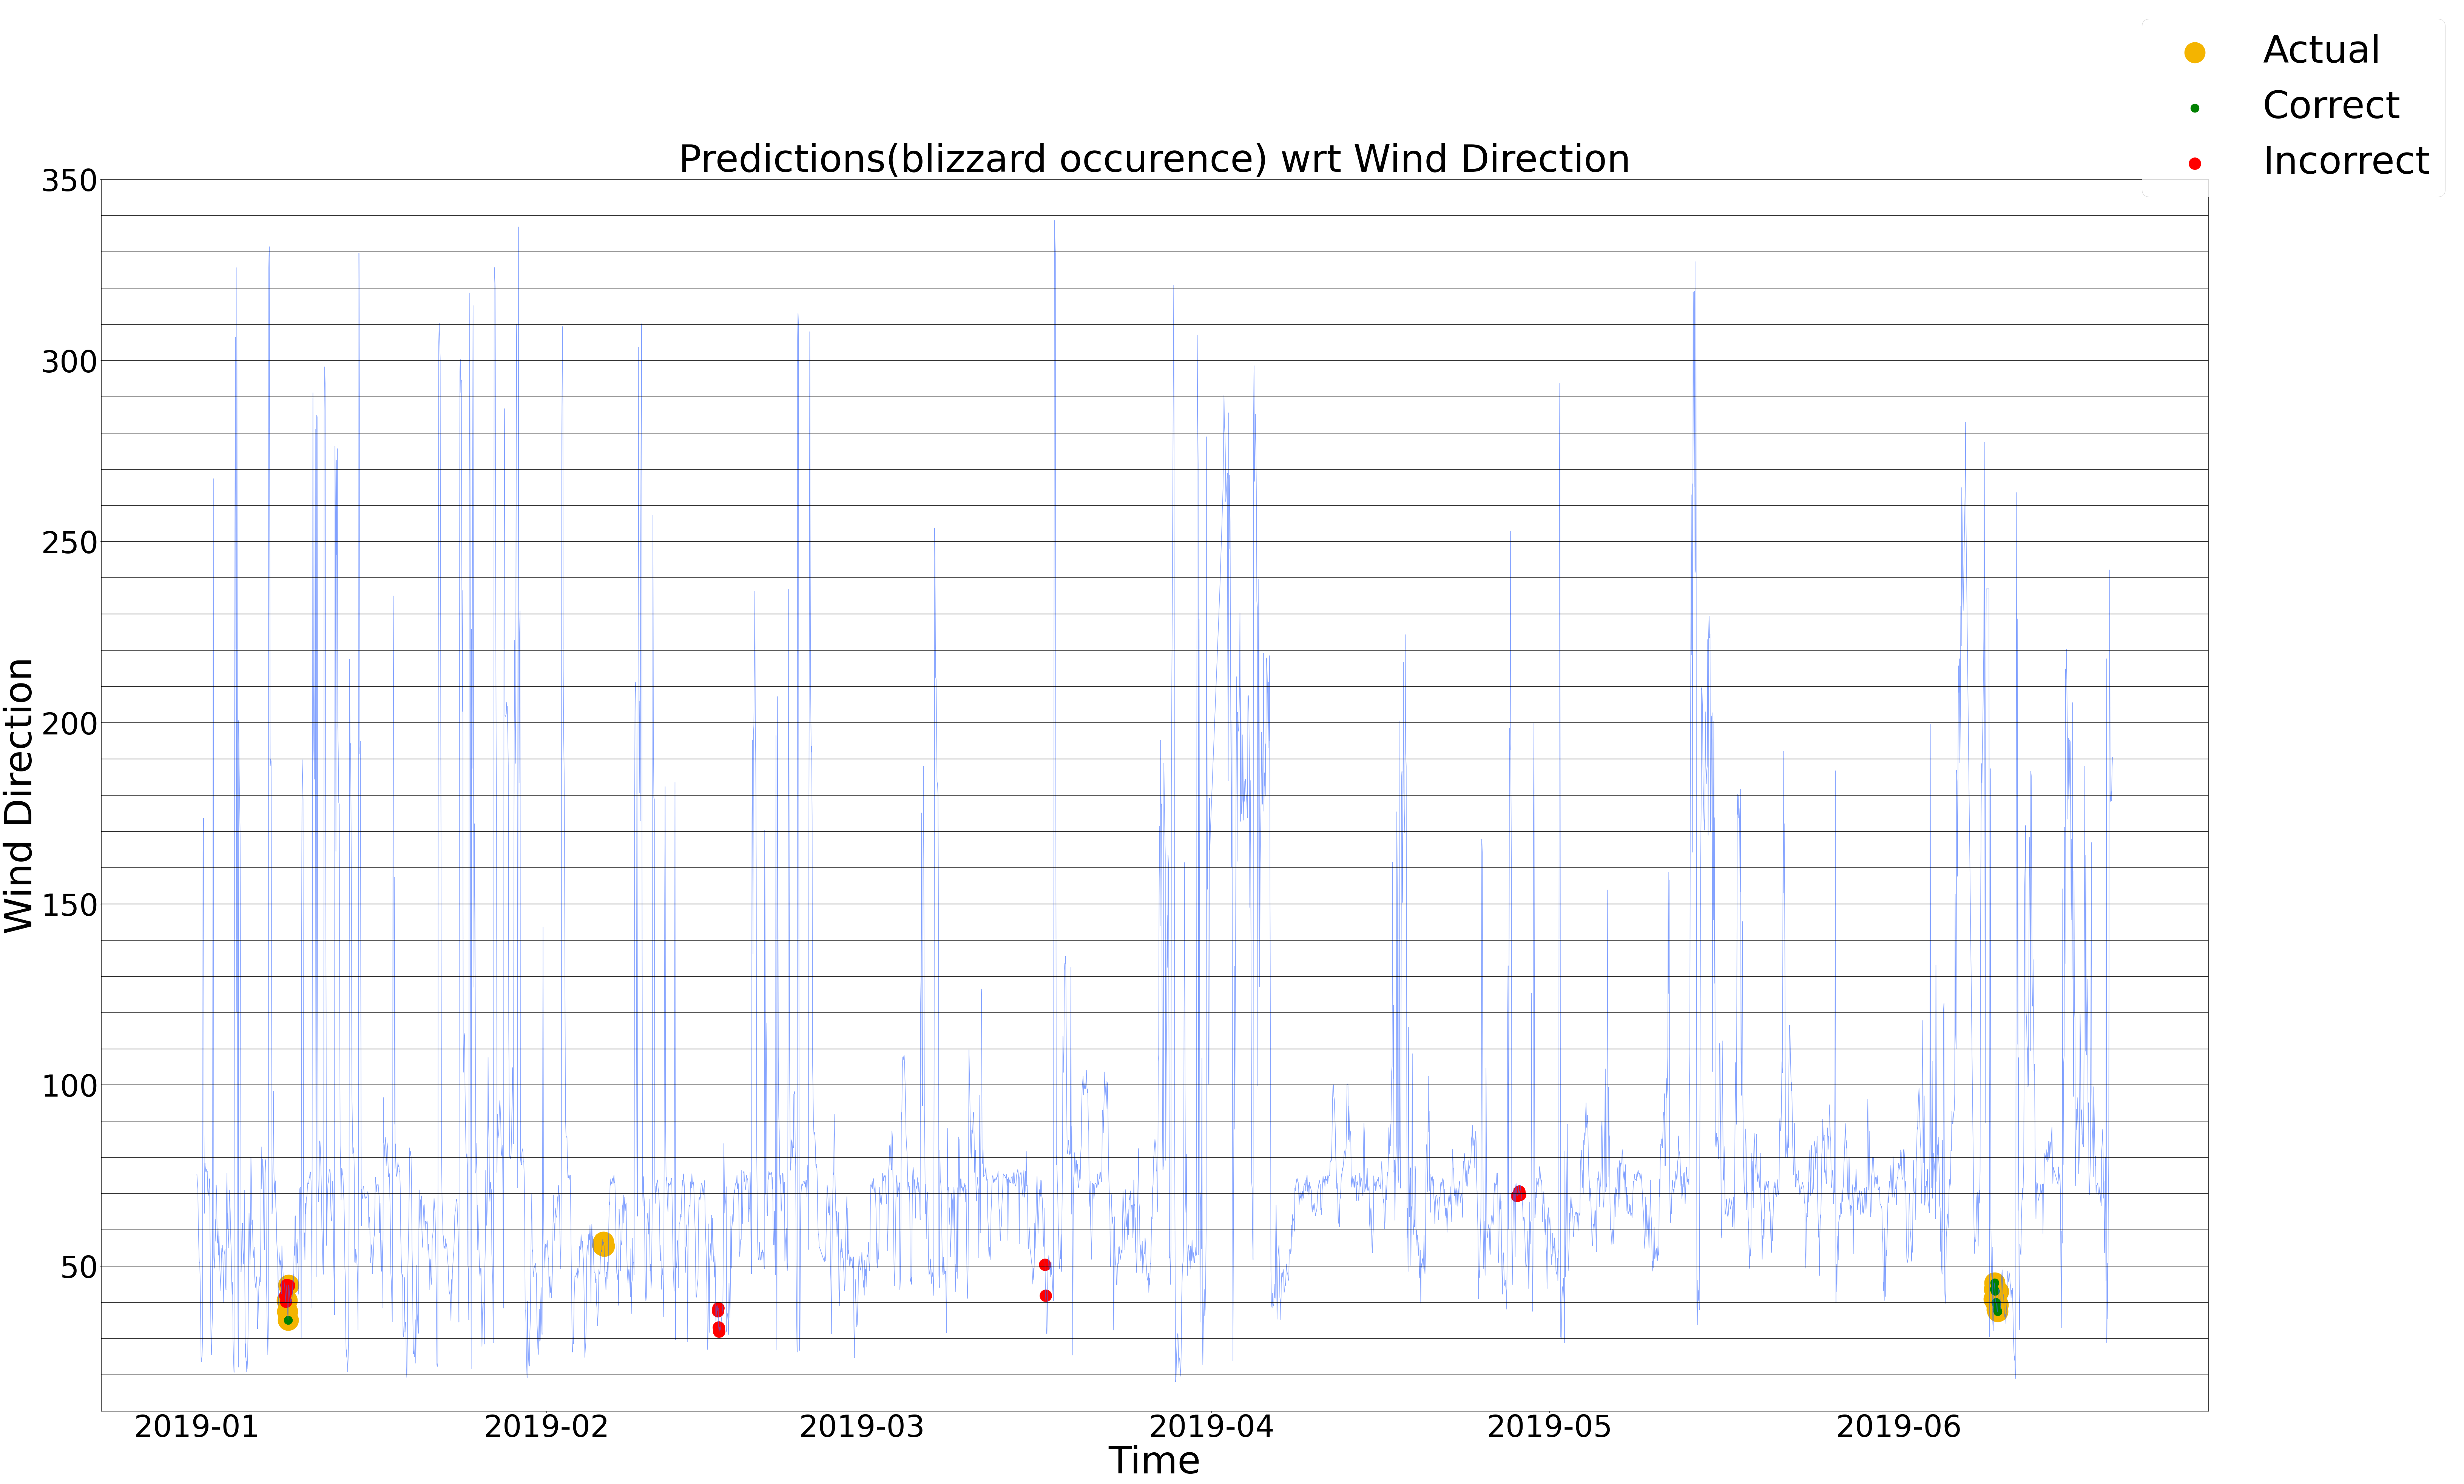

In [36]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.wd,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['wd'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['wd'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['wd'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(10,350)

for i in range(10,350,10):
  plt.axhline(y = i, c = 'black')



fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Wind Direction', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Wind Direction', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

<Figure size 1440x720 with 0 Axes>

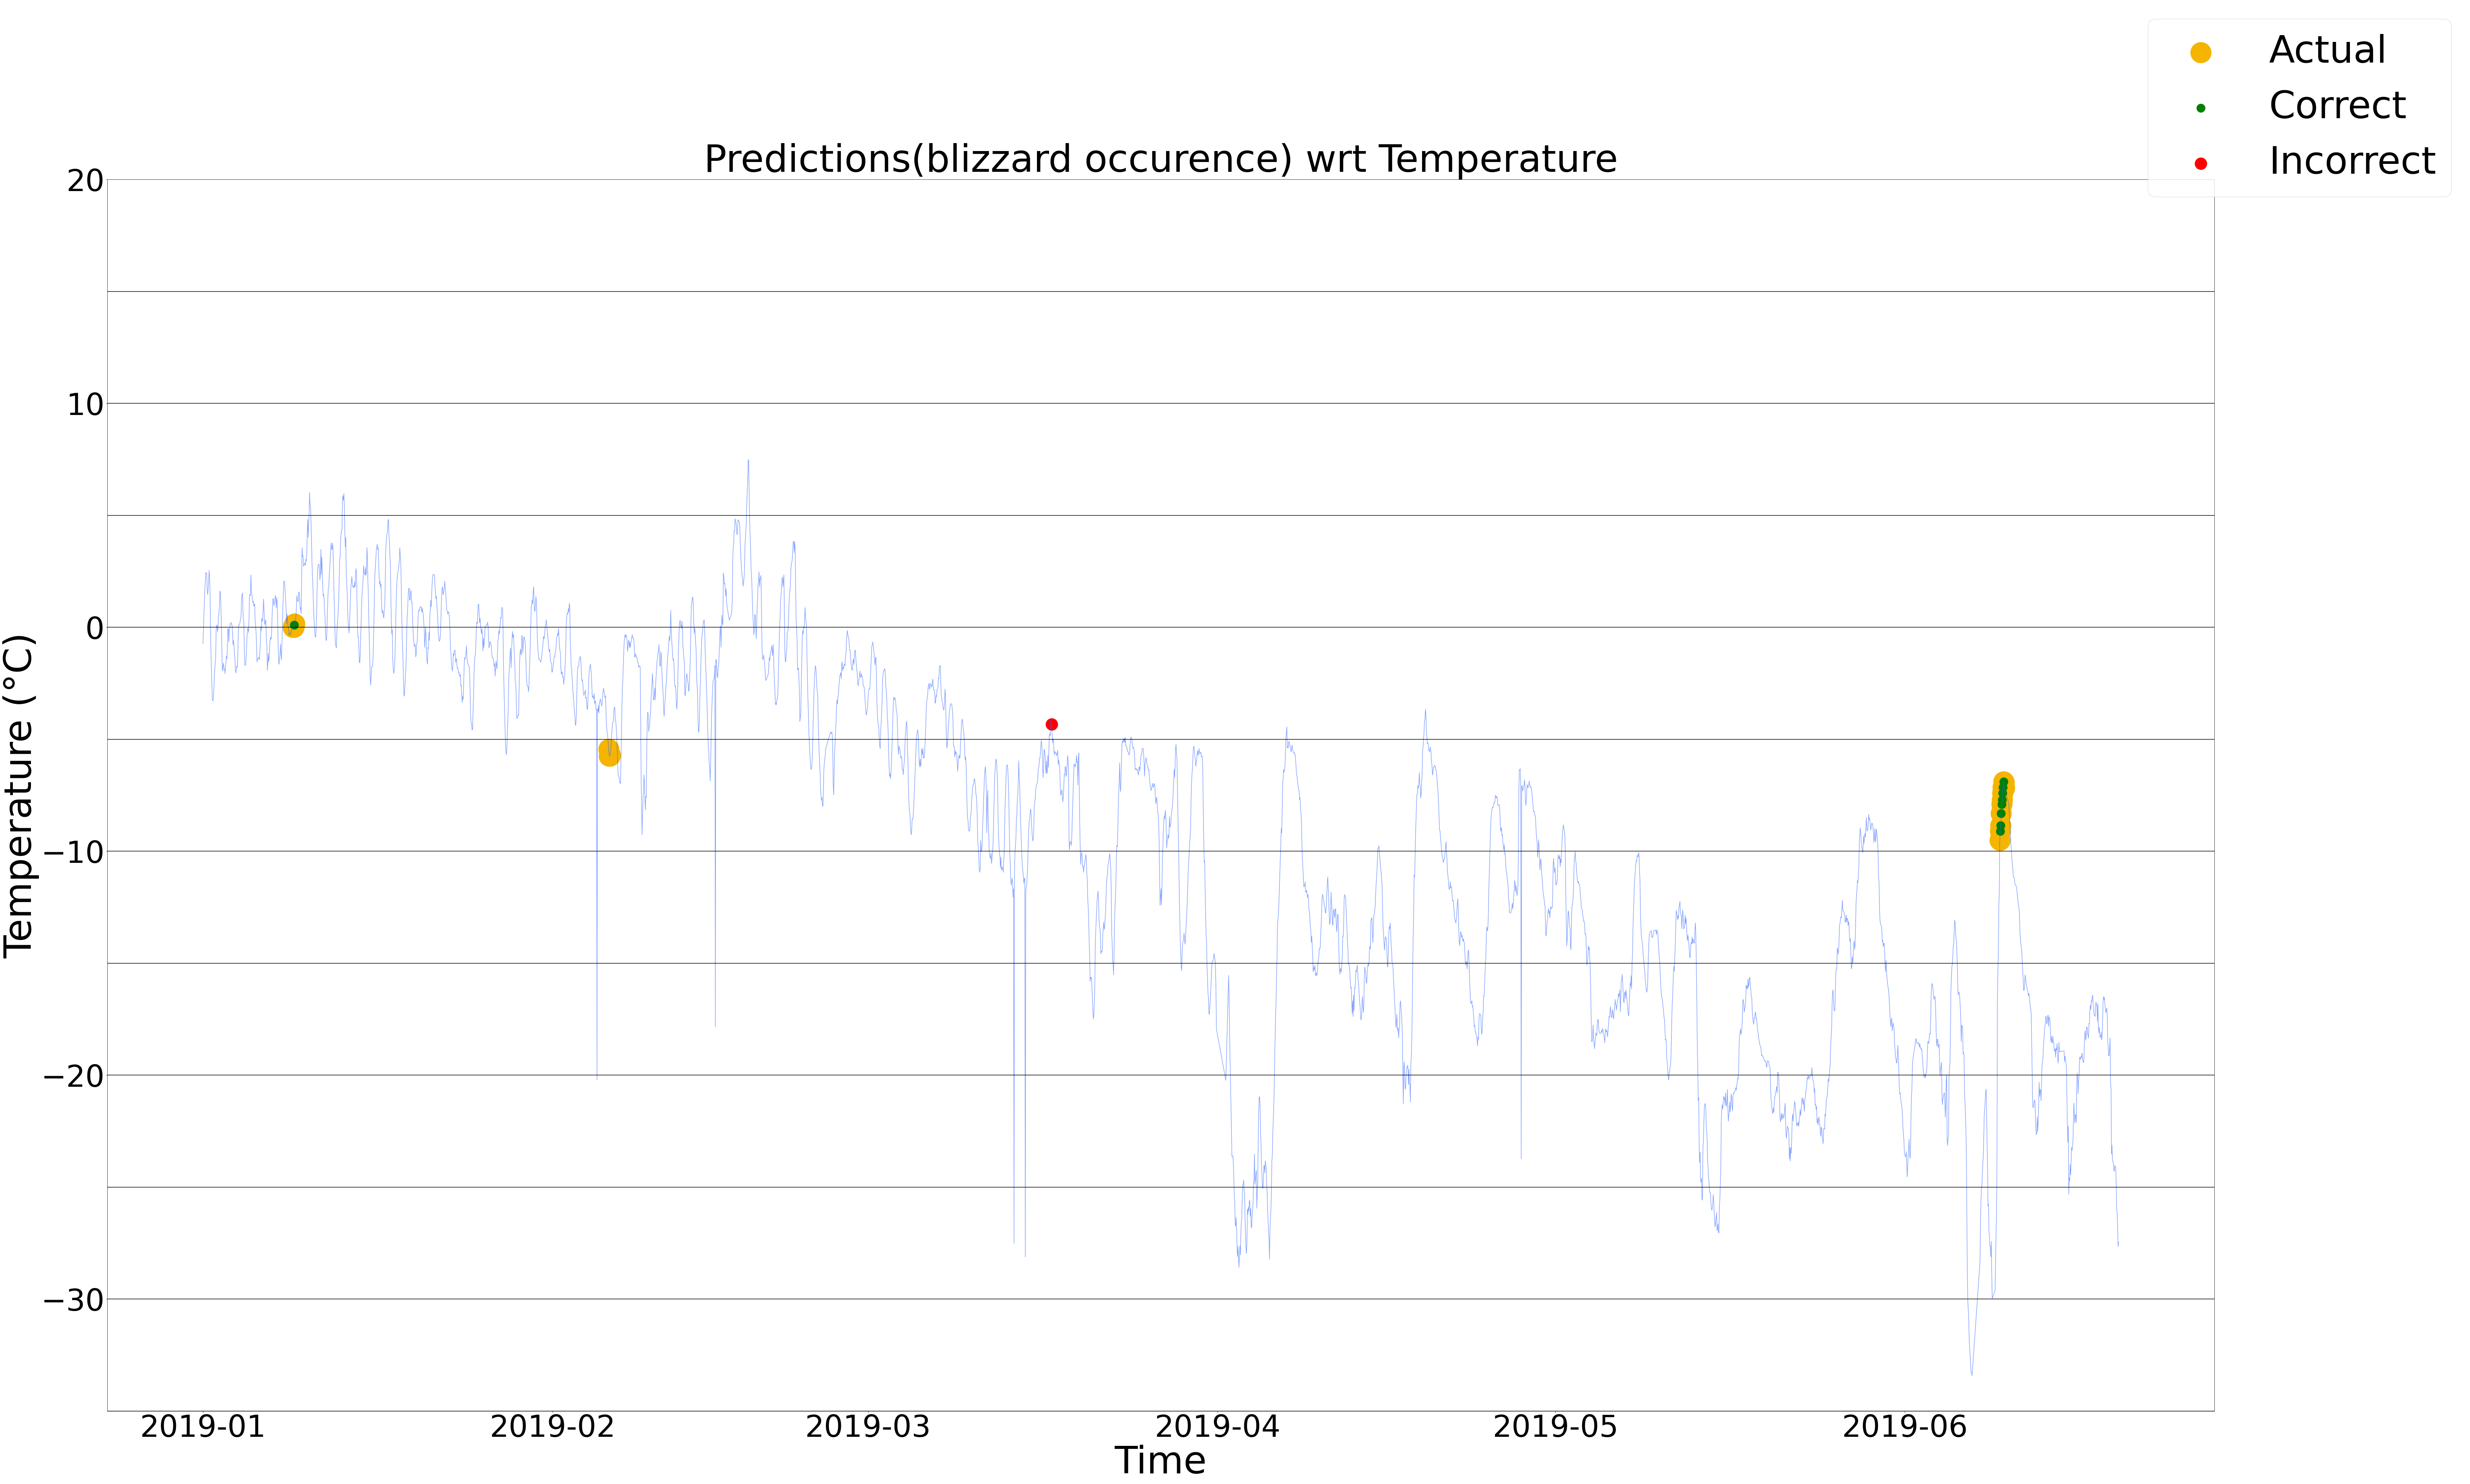

In [70]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.tempr,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['tempr'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['tempr'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['tempr'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(-35,20)

for i in range(-35,20,5):
  plt.axhline(y = i, c = 'black')


fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Temperature', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Temperature (' + degree_sign + 'C)', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

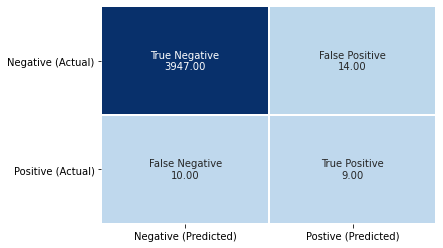

In [37]:
confudf = pd.DataFrame(confusion_matrix(y_test,y_pred), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,y_pred).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)

In [37]:
dfy['actual'] = pd.to_numeric(dfy['actual'],downcast='signed')
dfy.head()

ws      ap     rh  tempr     wd  actual  pred result
obstime                                                                     
2019-01-01 00:00:00  19.12  982.55  35.65  -0.72  75.29       0     0     no
2019-01-01 01:00:00  19.78  982.30  32.88  -0.05  72.93       0     0     no
2019-01-01 02:00:00  20.50  981.97  31.19   0.61  71.25       0     0     no
2019-01-01 03:00:00  19.25  981.84  30.32   1.19  61.32       0     0     no
2019-01-01 04:00:00  19.19  981.65  30.38   1.74  55.35       0     0     no

In [40]:
dfy['date'] = dfy.index.map(lambda x : str(x).split()[0])
dfy['month']= dfy['date'].map(lambda x : x.split('-')[1])
dfy.tail()

ws      ap     rh  tempr      wd  actual  pred result  \
obstime                                                                         
2019-06-19 19:00:00   9.87  985.45  68.47 -26.06  178.30       0     0     no   
2019-06-19 20:00:00   9.72  986.18  68.88 -26.10  181.10       0     0     no   
2019-06-19 21:00:00   9.52  986.89  66.32 -26.75  178.45       0     0     no   
2019-06-19 22:00:00  10.82  987.76  64.92 -27.64  187.17       0     0     no   
2019-06-19 23:00:00  12.74  988.86  61.88 -27.46  190.50       0     0     no   

                           date month  
obstime                                
2019-06-19 19:00:00  2019-06-19    06  
2019-06-19 20:00:00  2019-06-19    06  
2019-06-19 21:00:00  2019-06-19    06  
2019-06-19 22:00:00  2019-06-19    06  
2019-06-19 23:00:00  2019-06-19    06

In [55]:
jan_dfy = dfy[dfy['month']=="05"]
jan_actual = np.array(jan_dfy['actual'])
jan_pred = np.array(jan_dfy['pred'])
confudf = pd.DataFrame(confusion_matrix(jan_actual,jan_pred), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(jan_actual,jan_pred).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)
plt.title("Confusion Matrix for June 2019")
plt.yticks(rotation = 0)

ws           ap          rh       tempr          wd  actual  \
count  742.000000   742.000000  742.000000  742.000000  742.000000   742.0   
mean    10.361240   988.955094   51.479394  -16.978679   82.574946     0.0   
std      5.518569     8.880082   11.958389    4.342842   40.228340     0.0   
min      0.540000   969.510000   34.140000  -27.050000   28.880000     0.0   
25%      6.185000   983.962500   42.430000  -20.687500   64.907500     0.0   
50%      9.600000   988.390000   47.440000  -17.085000   72.140000     0.0   
75%     13.787500   994.482500   58.995000  -13.562500   81.957500     0.0   
max     27.980000  1008.960000   83.990000   -8.350000  327.310000     0.0   

        pred  
count  742.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0